In [1]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from pytz import all_timezones as atz
from pprint import pprint

%matplotlib inline

In [2]:
# different date time formats
dates = ['2020-11-25 2:30:00 PM', 'Jan 5, 2020 18:45:00', '01/11/2020', '2020.01.11', '2020/01/11', '20201105']

In [3]:
# convert them to one format using datetime
pd.to_datetime(dates)

DatetimeIndex(['2020-11-25 14:30:00', '2020-01-05 18:45:00',
               '2020-01-11 00:00:00', '2020-01-11 00:00:00',
               '2020-01-11 00:00:00', '2020-11-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [4]:
# setting how the date adn time should be read for countries that may put the day first
pd.to_datetime(dates).strftime('%d-%m-%y')

Index(['25-11-20', '05-01-20', '11-01-20', '11-01-20', '11-01-20', '05-11-20'], dtype='object')

In [5]:
# import facebook data
df = pd.read_csv('data/FB_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/20/2019,190.949997,191.160004,187.639999,189.529999,189.529999,14635700
1,6/21/2019,188.750000,192.000000,188.750000,191.139999,191.139999,22751200
2,6/24/2019,192.419998,193.979996,191.570007,192.600006,192.600006,15509000
3,6/25/2019,192.880005,193.139999,188.130005,188.839996,188.839996,16750300
4,6/26/2019,189.539993,190.759995,187.309998,187.660004,187.660004,12808600


In [6]:
# create dataframe from Facebook data with Date as the index and the date converted
df = pd.read_csv('data/FB_data.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-20,190.949997,191.160004,187.639999,189.529999,189.529999,14635700
2019-06-21,188.750000,192.000000,188.750000,191.139999,191.139999,22751200
2019-06-24,192.419998,193.979996,191.570007,192.600006,192.600006,15509000
2019-06-25,192.880005,193.139999,188.130005,188.839996,188.839996,16750300
2019-06-26,189.539993,190.759995,187.309998,187.660004,187.660004,12808600


In [7]:
# we may only need part of the data, like one month, so we resample the data
# example, resample for the month of June 2019
df['2019-06']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-20,190.949997,191.160004,187.639999,189.529999,189.529999,14635700
2019-06-21,188.750000,192.000000,188.750000,191.139999,191.139999,22751200
2019-06-24,192.419998,193.979996,191.570007,192.600006,192.600006,15509000
2019-06-25,192.880005,193.139999,188.130005,188.839996,188.839996,16750300
2019-06-26,189.539993,190.759995,187.309998,187.660004,187.660004,12808600
2019-06-27,189.880005,198.880005,188.270004,189.500000,189.500000,11159000
2019-06-28,190.550003,193.199997,189.940002,193.000000,193.000000,16378900


In [8]:
# what is the mean of the opening stock price
df['2019-06'].Open.mean()

190.71000014285715

In [9]:
# data for individual date (2019-06-21)
df.loc['2019-06-21']

Open         1.887500e+02
High         1.920000e+02
Low          1.887500e+02
Close        1.911400e+02
Adj Close    1.911400e+02
Volume       2.275120e+07
Name: 2019-06-21 00:00:00, dtype: float64

In [10]:
# lets look at two weeks
df.loc['2019-06-27': '2019-07-10']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-27,189.880005,198.880005,188.270004,189.500000,189.500000,11159000
2019-06-28,190.550003,193.199997,189.940002,193.000000,193.000000,16378900
2019-07-01,195.210007,195.279999,191.929993,193.000000,193.000000,14204700
2019-07-02,193.000000,195.000000,192.710007,195.000000,195.000000,9050000
2019-07-03,194.160004,197.399994,194.160004,197.199997,197.199997,10246100
2019-07-05,196.179993,197.070007,194.169998,196.399994,196.399994,11164100
2019-07-08,195.190002,196.679993,193.639999,195.759995,195.759995,9723900
2019-07-09,194.970001,199.460007,194.889999,199.210007,199.210007,14698600
2019-07-10,200.000000,202.960007,199.669998,202.729996,202.729996,20571700


In [11]:
# what are the monthly avgs for closing data
df.Close.resample('M').mean()

Date
2019-06-30    190.324286
2019-07-31    199.595454
2019-08-31    184.497726
2019-09-30    185.735000
2019-10-31    184.383912
2019-11-30    195.718500
2019-12-31    201.951904
2020-01-31    216.643333
2020-02-29    207.505263
2020-03-31    165.747727
2020-04-30    177.003335
2020-05-31    216.549001
2020-06-30    232.671332
Freq: M, Name: Close, dtype: float64

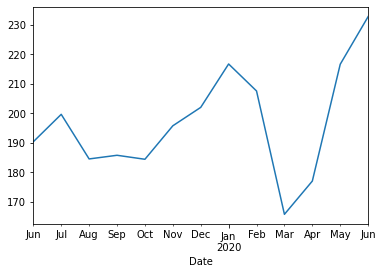

In [12]:
# what does this look like visually
df.Close.resample('M').mean().plot()

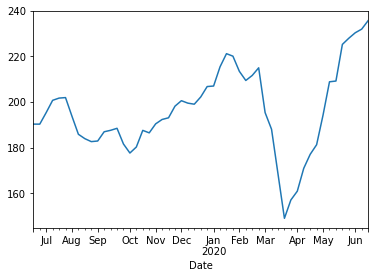

In [13]:
# weekly
df.Close.resample('W').mean().plot()

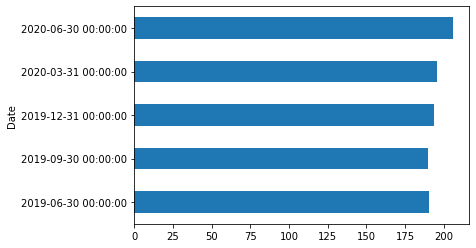

In [14]:
# quarterly as a bar plot
df.Close.resample('Q').mean().plot(kind='barh')

### Shift
- shifting the data

In [15]:
# shift
df1 = pd.DataFrame(df['Open'])
df1.head()

,Open
Date,
2019-06-20,190.949997
2019-06-21,188.750000
2019-06-24,192.419998
2019-06-25,192.880005
2019-06-26,189.539993


In [16]:
# the data that was in 2019-06-20 moved down to 2019-06-21
# this was repeated down the column
df1.shift(1)

,Open
Date,
2019-06-20,NaN
2019-06-21,190.949997
2019-06-24,188.750000
2019-06-25,192.419998
2019-06-26,192.880005
...,...
2020-06-15,229.899994
2020-06-16,225.089996
2020-06-17,237.139999


In [17]:
# the data that was in 2019-06-21 moved up to 2019-06-21
# this was repeated down the column
df1.shift(-1)

,Open
Date,
2019-06-20,188.750000
2019-06-21,192.419998
2019-06-24,192.880005
2019-06-25,189.539993
2019-06-26,189.880005
...,...
2020-06-15,237.139999
2020-06-16,235.000000
2020-06-17,234.990005


In [18]:
# use case
df1['Prev Day Opening'] = df1['Open'].shift(1)
df1.head()

,Open,Prev Day Opening
Date,,
2019-06-20,190.949997,NaN
2019-06-21,188.750000,190.949997
2019-06-24,192.419998,188.750000
2019-06-25,192.880005,192.419998
2019-06-26,189.539993,192.880005


In [19]:
# change in 1-day data 
df1['1 day change'] = df1['Open'] - df1['Prev Day Opening']
df1.head()

,Open,Prev Day Opening,1 day change
Date,,,
2019-06-20,190.949997,NaN,NaN
2019-06-21,188.750000,190.949997,-2.199997
2019-06-24,192.419998,188.750000,3.669998
2019-06-25,192.880005,192.419998,0.460007
2019-06-26,189.539993,192.880005,-3.340012


In [20]:
# with week total in %
df1['One week total return'] = (df1['Open'] - df1['Open'].shift(5)) * 100 / df1['Open'].shift(5)

In [21]:
df1.tail()

,Open,Prev Day Opening,1 day change,One week total return
Date,,,,
2020-06-15,225.089996,229.899994,-4.809998,-1.720300
2020-06-16,237.139999,225.089996,12.050003,2.427434
2020-06-17,235.000000,237.139999,-2.139999,-2.473442
2020-06-18,234.990005,235.000000,-0.009995,2.196226
2020-06-19,237.789993,234.990005,2.799988,3.431927


In [22]:
# convert the index to a local timezone.
# the client my be in a diffent timezone, so you want to make sure they are getting accurate data
df2 = df.copy()

In [23]:
df2.index = df2.index.tz_localize(tz='US/Eastern')
df2.index

DatetimeIndex(['2019-06-20 00:00:00-04:00', '2019-06-21 00:00:00-04:00',
               '2019-06-24 00:00:00-04:00', '2019-06-25 00:00:00-04:00',
               '2019-06-26 00:00:00-04:00', '2019-06-27 00:00:00-04:00',
               '2019-06-28 00:00:00-04:00', '2019-07-01 00:00:00-04:00',
               '2019-07-02 00:00:00-04:00', '2019-07-03 00:00:00-04:00',
               ...
               '2020-06-08 00:00:00-04:00', '2020-06-09 00:00:00-04:00',
               '2020-06-10 00:00:00-04:00', '2020-06-11 00:00:00-04:00',
               '2020-06-12 00:00:00-04:00', '2020-06-15 00:00:00-04:00',
               '2020-06-16 00:00:00-04:00', '2020-06-17 00:00:00-04:00',
               '2020-06-18 00:00:00-04:00', '2020-06-19 00:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date', length=253, freq=None)

In [24]:
df2 = df2.tz_convert('Europe/Berlin')
df2.index

DatetimeIndex(['2019-06-20 06:00:00+02:00', '2019-06-21 06:00:00+02:00',
               '2019-06-24 06:00:00+02:00', '2019-06-25 06:00:00+02:00',
               '2019-06-26 06:00:00+02:00', '2019-06-27 06:00:00+02:00',
               '2019-06-28 06:00:00+02:00', '2019-07-01 06:00:00+02:00',
               '2019-07-02 06:00:00+02:00', '2019-07-03 06:00:00+02:00',
               ...
               '2020-06-08 06:00:00+02:00', '2020-06-09 06:00:00+02:00',
               '2020-06-10 06:00:00+02:00', '2020-06-11 06:00:00+02:00',
               '2020-06-12 06:00:00+02:00', '2020-06-15 06:00:00+02:00',
               '2020-06-16 06:00:00+02:00', '2020-06-17 06:00:00+02:00',
               '2020-06-18 06:00:00+02:00', '2020-06-19 06:00:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', name='Date', length=253, freq=None)

In [25]:
# see all timezones
print(atz)

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [26]:
# generate a series of dates
rng = pd.date_range(start='11/1/2020', periods=10)
rng

DatetimeIndex(['2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08',
               '2020-11-09', '2020-11-10'],
              dtype='datetime64[ns]', freq='D')

In [27]:
# generate a series of dates for business days
rng_bus = pd.date_range(start='11/1/2020', periods=10, freq='B')
rng_bus

DatetimeIndex(['2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13'],
              dtype='datetime64[ns]', freq='B')

### Rolling function
- aggregates data for a specified number of DateTime

In [28]:
# take the mean of every three days
# takes the mean of three days; 20, 21, 24
# again for; 21, 24, 25
df[['High']].rolling(3).mean()[:10]

,High
Date,
2019-06-20,NaN
2019-06-21,NaN
2019-06-24,192.380000
2019-06-25,193.039998
2019-06-26,192.626663
2019-06-27,194.260000
2019-06-28,194.279999
2019-07-01,195.786667
2019-07-02,194.493332


In [29]:
# window=7; takes a 7-day average
# center=True; the avg is entered into the (window / 2). with window=7 ~ 7/2=3.5 or 4
    # data is entered in the 4th row of a given window instead of the last row
data_rol = df[['High', 'Low']].rolling(window=7, center=True).mean()
data_rol

,High,Low
Date,,
2019-06-20,NaN,NaN
2019-06-21,NaN,NaN
2019-06-24,NaN,NaN
2019-06-25,193.302857,188.801431
2019-06-26,193.891427,189.414287
...,...,...
2020-06-15,235.960002,229.287142
2020-06-16,235.905716,229.325714
2020-06-17,NaN,NaN


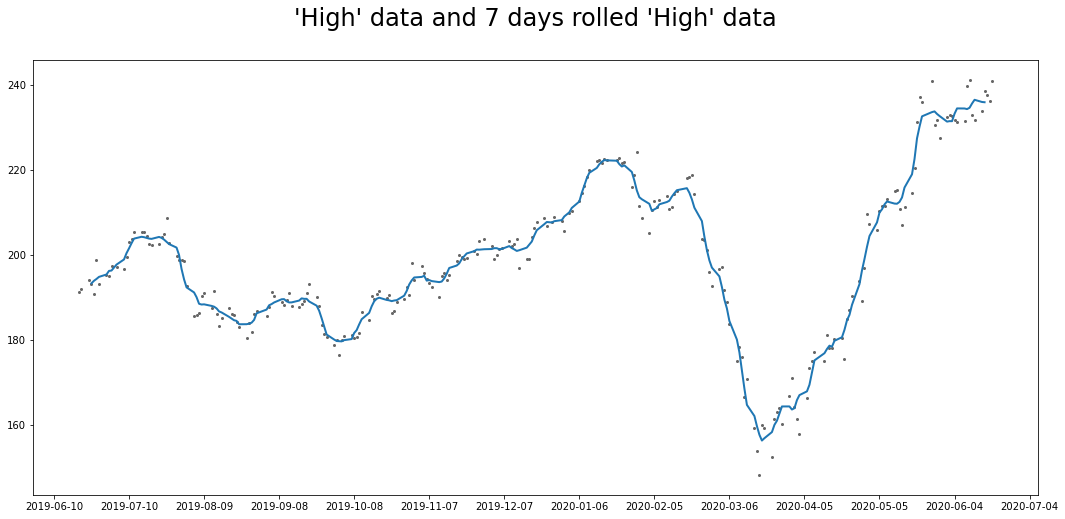

In [30]:
# plot original 'High' data and 7 days rolled 'High' data in same plot

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(df['High'], marker='.', markersize=4, color='0.4', linestyle='None', label='Daily')
plt.title("'High' data and 7 days rolled 'High' data\n", fontsize=24)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.plot(data_rol['High'], linewidth=2, label='7-d rolling mean')

ax.set_label('Month')
plt.show()

### Differencing for removing the trend
- trend is bad for modeling
- differencing takes the difference in data for a specific number of days

In [31]:
# example
df_first_order_diff = df[['High', 'Low']].diff()
df_first_order_diff

,High,Low
Date,,
2019-06-20,NaN,NaN
2019-06-21,0.839996,1.110001
2019-06-24,1.979996,2.820007
2019-06-25,-0.839997,-3.440002
2019-06-26,-2.380004,-0.820007
...,...,...
2020-06-15,2.110000,0.300003
2020-06-16,4.690003,8.199997
2020-06-17,-0.870011,-1.270004


In [32]:
# lets set the number of days to diff as 3
df[['High','Low']].diff(3)

,High,Low
Date,,
2019-06-20,NaN,NaN
2019-06-21,NaN,NaN
2019-06-24,NaN,NaN
2019-06-25,1.979995,0.490006
2019-06-26,-1.240005,-1.440002
...,...,...
2020-06-15,-7.440003,-10.479996
2020-06-16,5.570008,9.449997
2020-06-17,5.929992,7.229996


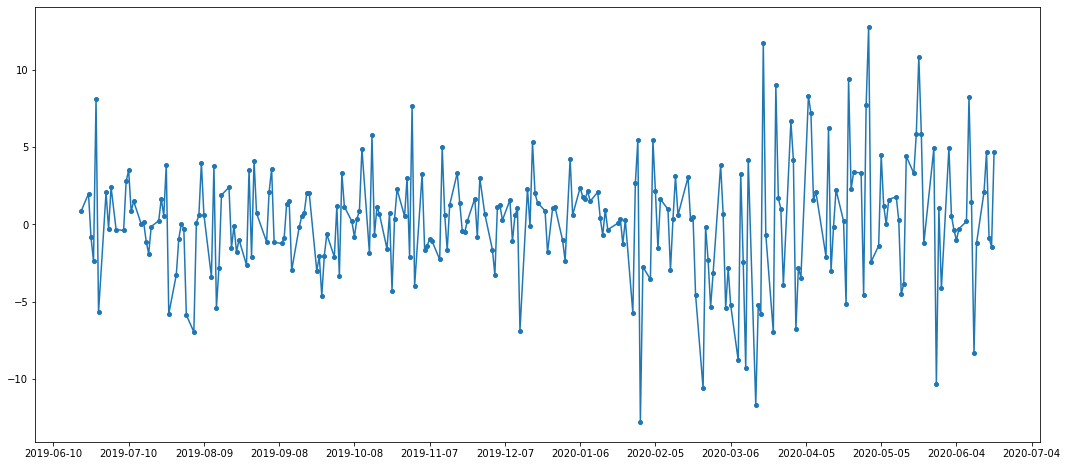

In [33]:
# let plot the above
start = '20-06-19'

fig, ax = plt.subplots(figsize=(18,8))

ax.plot(df_first_order_diff.loc[start:, 'High'], marker='o', markersize=4, linestyle='-', label='First Order Difference')
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))

## Time Feature Extraction
- extract year, month, week, or weekday

In [34]:
pd.DatetimeIndex(df.index).year

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Date', length=253)

In [35]:
df3 = df[['High', 'Low', 'Volume']]
df3['Year'] = pd.DatetimeIndex(df3.index).year
df3['Month'] = pd.DatetimeIndex(df3.index).month
df3['Weekday'] = pd.DatetimeIndex(df3.index).weekday
df3

<ipython-input-35-6aa81570d642>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year'] = pd.DatetimeIndex(df3.index).year
<ipython-input-35-6aa81570d642>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Month'] = pd.DatetimeIndex(df3.index).month


,High,Low,Volume,Year,Month,Weekday
Date,,,,,,
2019-06-20,191.160004,187.639999,14635700,2019,6,3
2019-06-21,192.000000,188.750000,22751200,2019,6,4
2019-06-24,193.979996,191.570007,15509000,2019,6,0
2019-06-25,193.139999,188.130005,16750300,2019,6,1
2019-06-26,190.759995,187.309998,12808600,2019,6,2
...,...,...,...,...,...,...
2020-06-15,233.770004,224.800003,15340300,2020,6,0
2020-06-16,238.460007,233.000000,15236700,2020,6,1
2020-06-17,237.589996,231.729996,19552800,2020,6,2


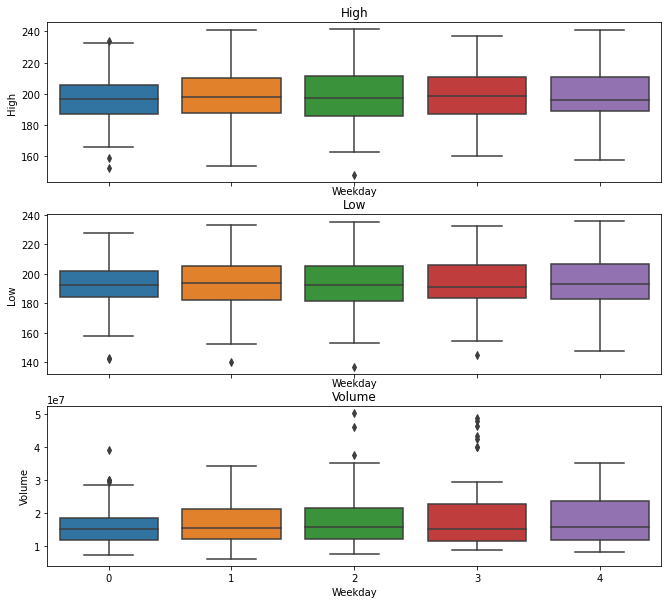

In [36]:
fig, axes = plt.subplots(3,1,figsize=(11,10), sharex=True)

for name, ax in zip(['High', 'Low', 'Volume'], axes):
    sns.boxplot(data=df3, x='Weekday', y=name, ax=ax)
    ax.set_title(name)

## Period and PeriodIndex

In [37]:
y = pd.Period('2020')
y

Period('2020', 'A-DEC')

In [38]:
dir(y)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_delta',
 '_from_ordinal',
 '_maybe_convert_freq',
 '_typ',
 'asfreq',
 'day',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'freq',
 'freqstr',
 'hour',
 'is_leap_year',
 'minute',
 'month',
 'now',
 'ordinal',
 'quarter',
 'qyear',
 'second',
 'start_time',
 'strftime',
 'to_timestamp',
 'week',
 'weekday',
 'weekofyear',
 'year']

In [39]:
y.start_time

Timestamp('2020-01-01 00:00:00')

In [40]:
y.end_time

Timestamp('2020-12-31 23:59:59.999999999')

In [41]:
month = pd.Period('2020-2', freq='M')
month

Period('2020-02', 'M')

In [42]:
month.start_time

Timestamp('2020-02-01 00:00:00')

In [43]:
month.end_time

Timestamp('2020-02-29 23:59:59.999999999')

In [44]:
month + 2

Period('2020-04', 'M')

In [47]:
d=pd.Period('2020-02-28')
d

Period('2020-02-28', 'D')

In [48]:
d+2

Period('2020-03-01', 'D')

In [49]:
q=pd.Period('2020Q1')
q

Period('2020Q1', 'Q-DEC')

In [50]:
q.asfreq('M', how='start')

Period('2020-01', 'M')

In [51]:
q.asfreq('M', how='end')

Period('2020-03', 'M')

In [52]:
q+1

Period('2020Q2', 'Q-DEC')

In [53]:
q1 = pd.Period('2020Q2', freq='Q-Jan')
q1

Period('2020Q2', 'Q-JAN')

In [54]:
idx = pd.period_range('2017', '2020', freq='Q')
idx

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2',
             '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4',
             '2020Q1'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [55]:
idx2 = pd.period_range('2017','2020', freq='Q-Jan')
idx2

PeriodIndex(['2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1',
             '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3',
             '2020Q4'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [59]:
idx3 = idx2.to_timestamp()
idx3

DatetimeIndex(['2016-11-01', '2017-02-01', '2017-05-01', '2017-08-01',
               '2017-11-01', '2018-02-01', '2018-05-01', '2018-08-01',
               '2018-11-01', '2019-02-01', '2019-05-01', '2019-08-01',
               '2019-11-01'],
              dtype='datetime64[ns]', freq='QS-NOV')

In [60]:
idx3.to_period()

PeriodIndex(['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3',
             '2019Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')